
<img src="img\double_mass_spring.png" alt="System" width="80%" />

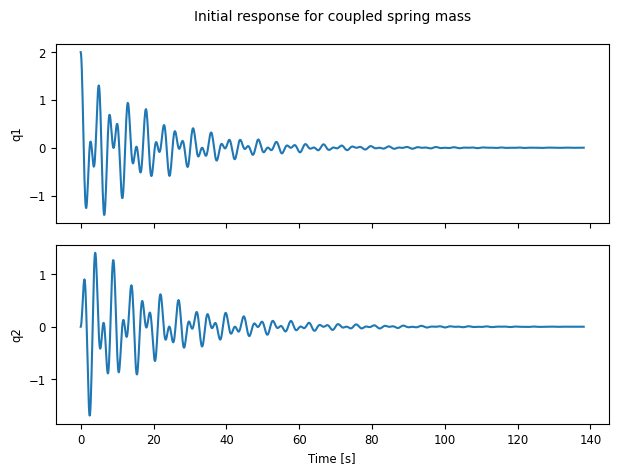

In [1]:
# Import the packages needed for the examples included in this notebook
# conda activate /Users/marcocampanale/anaconda3/envs/python-control 
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Define the parameters for the system
m, c, k = 1, 0.1, 2
# Create a linear system
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-2*k/m, k/m, -c/m, 0],
    [k/m, -2*k/m, 0, -c/m]
])
B = np.array([[0], [0], [0], [k/m]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = 0

#sys = ct.ss(A, B, C, D,)
sys = ct.ss(A, B, C, D, outputs=['q1', 'q2'], name="coupled spring mass")
# print(sys)

response = ct.initial_response(sys, X0=[2, 0, 0, 0])
cplt = response.plot()
plt.show()  

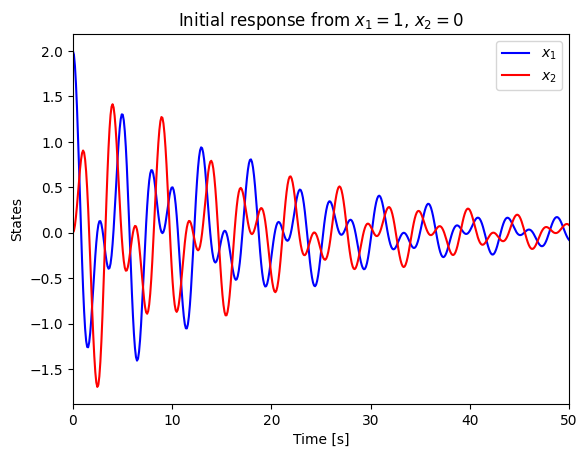

In [2]:
# Plot the outputs of the system on the same graph, in different colors
t = response.time
x = response.states
plt.plot(t, x[0], 'b', t, x[1], 'r')
plt.legend(['$x_1$', '$x_2$'])
plt.xlim(0, 50)
plt.ylabel('States')
plt.xlabel('Time [s]')
plt.title("Initial response from $x_1 = 1$, $x_2 = 0$");
